In [1]:
import keras
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
word_to_index_table = imdb.get_word_index()
index_to_word_table = {idx:word for word,idx in word_to_index_table.items()}

In [3]:
decoded_review = ' '.join([index_to_word_table.get(idx-3,'?') for idx in train_data[0]])
print('First review =', decoded_review)

First review = ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

In [4]:
def vectorize_sequences(sequences, dim=10000):
    result = np.zeros((len(sequences), dim))
    for idx, sequence in enumerate(sequences):
        result[idx, sequence] = 1.
    return result

In [5]:
# Vectorize input data, one-hot encoding.

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers

ndim = 10000

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(ndim,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
# First 10000 samples are used for validation.

nsample = 10000

partial_train_input = x_train[nsample:]
partial_train_labels = y_train[nsample:]

val_input = x_train[:nsample]
val_labels = y_train[:nsample]

In [8]:
# Compile a model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_train_input, partial_train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(val_input, val_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_ac

In [9]:
# Visualize training and validation loss each iteration.

import matplotlib.pyplot as plt

history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = np.arange(len(train_loss)) + 1

plt.figure('Visualize training and validation loss')
plt.title('Training and validation loss')
plt.plot(epochs, train_loss, color='r', label='Training loss')
plt.plot(epochs, val_loss, color='b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

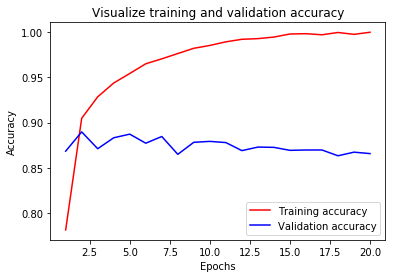

In [10]:
# Visualize training and validation accuracy each iteration.

train_acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.figure('Visualize training and validation accuracy')
plt.title('Visualize training and validation accuracy')
plt.plot(epochs, train_acc, color='r', label='Training accuracy')
plt.plot(epochs, val_acc, color='b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# Release a gpu resource.
from keras import backend as K

K.clear_session()

In [41]:
# Model is overfitting when epochs=20.
# Try again with epochs=4.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(ndim,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.1405 - acc: 0.8008
Epoch 2/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.0709 - acc: 0.9064
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.0519 - acc: 0.9330
Epoch 4/4
25000/25000 [==============================] - 1s 56us/step


In [42]:
print('Model accuracy =%f' % result[1])

Model accuracy =0.879200


In [46]:
print(model.predict(x_test))

def decode_review(encoded_review):
    decoded_review = ' '.join([index_to_word_table.get(idx-3,'?') for idx in encoded_review])
    return decoded_review

# Model predict this review is positive, 0.998.
positive_review = decode_review(test_data[1]) 
# Model predict this review is negative, 0.035.
negative_review = decode_review(test_data[-1])

print('-' * 80)
print('<Positive review> =', positive_review)
print('-' * 80)
print('<Negative review> =', negative_review)

[[ 0.08857419]
 [ 0.99899894]
 [ 0.96163625]
 ..., 
 [ 0.34067941]
 [ 0.03554827]
 [ 0.76603836]]
--------------------------------------------------------------------------------
<Positive review> = ? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy 